In [84]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox

from itertools import chain

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import ElasticNetCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
df_train = pd.read_csv('../data/ames_clean.csv', index_col='id')
df_kag = pd.read_csv('../data/ames_clean_test.csv', index_col='id')

df_train['ms_subclass'] = df_train['ms_subclass'].astype('object')
df_kag['ms_subclass'] = df_kag['ms_subclass'].astype('object')


In [86]:
target = 'saleprice'
y = df_train[target]
X = df_train.drop(target,1)

I'm going to dummy all of the categorical variables that don't have lots of repeating information like in Garage and Basement. 

In [87]:
def dummy_wrapper(X):
    
    X_obj_cols = X.select_dtypes(include='object').columns
    garage_cols = [col for col in X_obj_cols if 'garage' in col]
    bsmt_cols = [col for col in X_obj_cols if 'bsmt' in col]

    
    obj_cols = []
    for col in X_obj_cols:
        if (not col in bsmt_cols) and (not col in garage_cols):
            obj_cols.append(col)
    
    X = pd.get_dummies(data=X, columns=obj_cols,  prefix_sep='__', drop_first=True)
    
    garage = pd.get_dummies(data=X[garage_cols], prefix_sep='__', drop_first=False)
    bsmt = pd.get_dummies(data=X[bsmt_cols], prefix_sep='__', drop_first=False)

    
    X.drop(garage_cols,1, inplace=True)
    X.drop(bsmt_cols,1, inplace=True)
    no_garage_cols = [col for col in garage.columns if 'No Garage' in col]
    no_bsmt_cols = [col for col in bsmt.columns if 'No Basement' in col]

    
    
    keep_garage = no_garage_cols.pop()
    keep_bsmt = no_bsmt_cols.pop()

    garage.drop(labels=no_garage_cols, axis=1, inplace=True)
    bsmt.drop(labels=no_bsmt_cols, axis=1, inplace=True)

    return pd.concat([X, garage, bsmt], axis=1)

In [88]:
num_type_X = X.select_dtypes(exclude='object')
num_type_kag = df_kag.select_dtypes(exclude='object')

In [59]:
num_type_kag.columns == num_type_X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [113]:
tmp = pd.DataFrame({})

In [117]:
for col in num_type_X.columns[:]:
    print(col)
    X[col] = pd.Series(boxcox(X[col] + 1)[0])
    df_kag[col] = pd.Series(boxcox(df_kag[col] + 1)[0])

lot_frontage
lot_area
overall_qual
overall_cond
year_built
year_remod/add
mas_vnr_area
bsmtfin_sf_1
bsmtfin_sf_2
bsmt_unf_sf
total_bsmt_sf
1st_flr_sf
2nd_flr_sf
low_qual_fin_sf
gr_liv_area
bsmt_full_bath
bsmt_half_bath
full_bath
half_bath
bedroom_abvgr
kitchen_abvgr
totrms_abvgrd
fireplaces
garage_cars
garage_area


/Users/timdwyer/anaconda3/envs/dsi/lib/python3.6/site-packages/scipy/stats/morestats.py:901: RuntimeWarning: overflow encountered in square
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/Users/timdwyer/anaconda3/envs/dsi/lib/python3.6/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


wood_deck_sf
open_porch_sf
enclosed_porch
3ssn_porch
screen_porch
pool_area
misc_val
mo_sold
yr_sold


In [116]:
tmp.head()

,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,...,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
0,17.588089,22.661785,4.728987,3.757163,2.158141e+71,9.951744e+115,2.990519,13.738336,0.0,22.885360,...,173.511339,0.0000,3.967278,0.0,0.0,0.0,0.0,0.0,2.366991,0.378046
1,12.586755,21.913210,5.409267,2.758333,2.694448e+71,8.632260e+115,2.788575,14.477339,0.0,27.488077,...,197.828007,0.0000,4.524874,0.0,0.0,0.0,0.0,0.0,3.017382,0.378046
2,16.592171,20.269928,4.029790,3.447948,1.667318e+71,1.031108e+116,0.000000,15.068607,0.0,29.876784,...,102.040937,0.0000,4.145221,0.0,0.0,0.0,0.0,0.0,0.896669,0.378046
3,17.307966,21.198417,4.029790,2.758333,3.008177e+71,1.031108e+116,0.000000,0.000000,0.0,32.415109,...,151.069721,3.8162,0.000000,0.0,0.0,0.0,0.0,0.0,3.017382,0.378046
4,18.543038,22.904674,4.728987,3.757163,9.092548e+70,8.037933e+115,0.000000,0.000000,0.0,42.843145,...,176.155148,0.0000,4.280544,0.0,0.0,0.0,0.0,0.0,2.366991,0.378046


In [102]:
boxcox(X['yr_sold'])

(array([0.27929369, 0.27929369, 0.27929369, ..., 0.27929369, 0.27929369,
        0.27929369]), -3.580460442865395)

In [94]:
num_type_X.columns
    

Index(['lot_frontage', 'lot_area', 'overall_qual', 'overall_cond',
       'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_cars',
       'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch',
       '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold',
       'yr_sold'],
      dtype='object')

In [27]:
X_dummies = dummy_wrapper(X)
kag_dummies = dummy_wrapper(df_kag)


In [28]:
kag_dummies.shape

(879, 257)

In [29]:
X_dummies.shape

(2016, 274)

In [30]:
for col in kag_dummies.columns:
    if col not in X_dummies.columns:
        print(col)

roof_matl__Metal
roof_matl__Roll
exterior_1st__PreCast
exterior_2nd__Other
exterior_2nd__PreCast
mas_vnr_type__CBlock
heating__GasA
kitchen_qual__Po
sale_type__VWD


These ones are easy to fix, just drop them.

In [31]:
for col in kag_dummies.columns:
    if col not in X_dummies.columns:
        kag_dummies.drop(col,1, inplace=True)

The remaining columns that don't show up in the testing set but do in the training set, we can just set those to 0. They're all dummy classifiers anywhere, this means that these properties just never showed up in the testing data.

In [32]:
for col in X_dummies.columns:
    if col not in kag_dummies.columns:
        kag_dummies[col] = pd.Series([0 for _ in range(kag_dummies.shape[0])], index = kag_dummies.index)


In [33]:
X_dummies.sort_index(axis=1, inplace=True)
kag_dummies.sort_index(axis=1, inplace=True)


In [34]:
pf = PolynomialFeatures()
X_dummies = pf.fit_transform(X_dummies)
kag_dummies = pf.fit_transform(kag_dummies)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y)

ss = StandardScaler()
ss.fit(X_train)

X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

kag_sc = ss.transform(kag_dummies)

In [129]:
from itertools import chain

rho = [*chain(iter(np.linspace(.01, .3, 10)), iter(np.linspace(.6,1,10)))]
n_alphas = 10

encv = ElasticNetCV(l1_ratio=rho, n_alphas=n_alphas)
encv.fit(X_train_sc, y_train)
# encv.score(X_test_sc, y_test)

/Users/timdwyer/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


KeyboardInterrupt: 

In [ ]:
encv.score(X_test_sc, y_test)

In [15]:
encv.alpha_

0.009444444444444443

In [16]:
y_pred = encv.predict(X_test_sc)
mean_squared_error(y_test,y_pred)

0.02578734139987218

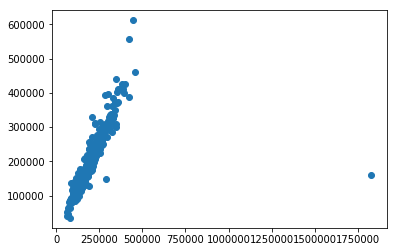

In [17]:
plt.scatter(np.exp(y_pred) - 1, np.exp(y_test)-1)

In [22]:
mean_squared_error(np.exp(y_test)-1, np.exp(y_pred)-1 ) ** .5

78022.03503973581

In [19]:
y_kag = pd.DataFrame(encv.predict(kag_sc), index=df_kag.index)
y_kag = np.exp(y_kag) + 1

In [20]:
y_kag.columns = ['SalePrice']

In [21]:
y_kag.sort_index().to_csv('submission.csv')